<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-and-Analyze" data-toc-modified-id="Load-and-Analyze-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load and Analyze</a></span></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Preprocessing</a></span></li><li><span><a href="#Feature-Engineering-for-traditional-ML" data-toc-modified-id="Feature-Engineering-for-traditional-ML-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Feature Engineering for traditional ML</a></span><ul class="toc-item"><li><span><a href="#TF-IDF" data-toc-modified-id="TF-IDF-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>TF-IDF</a></span></li></ul></li><li><span><a href="#Traditional-ML-Algorithms" data-toc-modified-id="Traditional-ML-Algorithms-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Traditional ML Algorithms</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#Naive-Bayes" data-toc-modified-id="Naive-Bayes-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Naive Bayes</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#Non-Linear-SVM" data-toc-modified-id="Non-Linear-SVM-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Non Linear SVM</a></span></li><li><span><a href="#Linear-SVM" data-toc-modified-id="Linear-SVM-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Linear SVM</a></span></li></ul></li><li><span><a href="#Word-Embeddings" data-toc-modified-id="Word-Embeddings-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Word Embeddings</a></span></li><li><span><a href="#Deep-Learning-Algorithms" data-toc-modified-id="Deep-Learning-Algorithms-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Deep Learning Algorithms</a></span><ul class="toc-item"><li><span><a href="#CNN" data-toc-modified-id="CNN-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>CNN</a></span></li><li><span><a href="#CNN-Multi-Layer" data-toc-modified-id="CNN-Multi-Layer-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>CNN Multi Layer</a></span></li><li><span><a href="#RNN" data-toc-modified-id="RNN-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>RNN</a></span></li><li><span><a href="#CNN-+-LSTM-Stacking" data-toc-modified-id="CNN-+-LSTM-Stacking-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>CNN + LSTM Stacking</a></span></li></ul></li><li><span><a href="#Training-and-Validation-Process" data-toc-modified-id="Training-and-Validation-Process-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Training and Validation Process</a></span><ul class="toc-item"><li><span><a href="#Word2Vec-learnt-from-data" data-toc-modified-id="Word2Vec-learnt-from-data-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Word2Vec learnt from data</a></span></li><li><span><a href="#Glove-Pretrained" data-toc-modified-id="Glove-Pretrained-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Glove Pretrained</a></span></li></ul></li><li><span><a href="#Results" data-toc-modified-id="Results-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Results</a></span></li></ul></div>

In [ ]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

nltk.download('wordnet') # Uncomment when running for the first time.
nltk.download('punkt')
nltk.download('stopwords')

import gensim
from gensim.models.word2vec import Word2Vec
from gensim.models import KeyedVectors

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.multiclass import OneVsRestClassifier

!pip install scikit-multilearn
import skmultilearn
from skmultilearn.problem_transform import BinaryRelevance, ClassifierChain, LabelPowerset

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

import tensorflow

from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, Model, model_from_json
from tensorflow.keras.layers import Input, Embedding, Dense, Flatten, Dropout, SpatialDropout1D, BatchNormalization, Activation
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, MaxPooling1D
from tensorflow.keras.layers import LSTM, GRU, Bidirectional

from keras.optimizers import SGD, Adam

from keras.layers.merge import concatenate
from tensorflow.keras.callbacks import ModelCheckpoint

from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline

## Load and Analyze

In [ ]:
source_path = '/content/drive/My Drive/AV_Independence/'
submission_path = '/content/drive/My Drive/AV_Independence/Submissions/'
data = pd.read_csv('/content/drive/My Drive/AV_Independence/train.csv')
test = pd.read_csv('/content/drive/My Drive/AV_Independence/test.csv')

In [ ]:
print(data.shape)
data.head()

(20972, 9)


,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0


In [ ]:
# Checking for NULL values

data.isnull().sum()

ID                      0
TITLE                   0
ABSTRACT                0
Computer Science        0
Physics                 0
Mathematics             0
Statistics              0
Quantitative Biology    0
Quantitative Finance    0
dtype: int64

Computer Science        8594
Physics                 6013
Mathematics             5618
Statistics              5206
Quantitative Biology     587
Quantitative Finance     249
dtype: int64


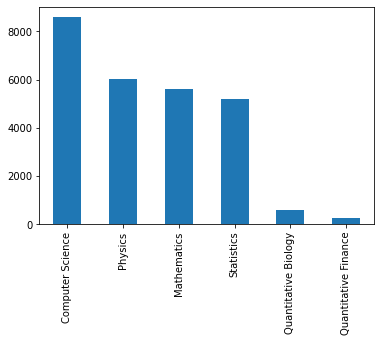

In [ ]:
# Output Label Distribution:

print(data.iloc[:,3:].sum(axis = 0))
data.iloc[:,3:].sum(axis = 0).plot(kind = 'bar')

Computer Science has the highest frequency distribution and Quantitative Finance has the least.

The occurences of QB and QF are very low and thus might cause issues with imbalance.

In [ ]:
# Number of datapoints with multiple labels. A new dataframe which is a subset of datapoints which consists of multiple labels is defined for analysis.

multilabel_da = data[data.iloc[:,3:].sum(axis = 1) > 1]
multilabel_da['Labels_Sum'] = multilabel_da.iloc[:, 4:].sum(axis = 1)
multilabel_da

In [ ]:
maximum_multi_label = multilabel_da['Labels_Sum'].max()
print('Maximum number of labels associated with a datapoint : ', maximum_multi_label)

multilabel_da[multilabel_da['Labels_Sum'] == 3]

Maximum number of labels associated with a datapoint is 3.

There are 10 such datapoints and 9 of them belong to the multilabel class {Physics, Mathematics. Statistics}

In [ ]:
multilabel_da[multilabel_da['Labels_Sum'] == 2].sum(axis = 0)

ID                                                               16481205
TITLE                   Many-Body Localization: Stability and Instabil...
ABSTRACT                  Rare regions with weak disorder (Griffiths r...
Computer Science                                                      241
Physics                                                               447
Mathematics                                                          1316
Statistics                                                           1275
Quantitative Biology                                                  114
Quantitative Finance                                                   30
Labels_Sum                                                           3182
dtype: object

Additional Possible Inisghts:

Most Paired Combo
Least Paired Combo

## Preprocessing

In [ ]:
y_train = np.array(data.iloc[:,3:])
output_labels = list(data.columns[3:])

In [ ]:
# Combine TITLE and ABSTRACT columns into a new column named Text

data['Text'] = data.TITLE +  data.ABSTRACT
test['Text'] = test.TITLE +  test.ABSTRACT

In [ ]:
def preprocess(text):
    
    punctuations = string.punctuation.replace("", " ").split()
    lemmatizer = WordNetLemmatizer()
    
    stopwords_list = set(stopwords.words('english'))
    #first_stop = [i for i in stopwords_list if len(i) <= 3 or i.endswith('re') or i.find('\'') != -1]
    
    text = text.lower()
    
    text = re.sub(r"[^a-zA-Z]", " ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"[-:,()\"\']", " ", text)
    text = re.sub(r"\s+", " ", text)
    
    tokens = nltk.word_tokenize(text)
    clean_words = [lemmatizer.lemmatize(tok) for tok in tokens if tok not in punctuations and tok not in stopwords_list]
    
    return ' '.join(clean_words)

In [ ]:
train_clean = data['Text'].apply(preprocess)
test_clean = test['Text'].apply(preprocess)

X_train_dl, X_valid_dl, y_train_dl, y_valid_dl = train_test_split(train_clean, 
                                                    y_train, 
                                                    test_size=0.1, 
                                                    random_state=42,)

X_train_dl = [i.split() for i in X_train_dl]
X_valid_dl = [i.split() for i in X_valid_dl]

X_test_dl = [i.split() for i in test_clean]

In [ ]:
print(np.array(y_train_dl).sum(axis=0))
print(np.array(y_valid_dl).sum(axis=0))

[7741 5390 5038 4690  529  223]
[853 623 580 516  58  26]


## Feature Engineering for traditional ML

### TF-IDF

In [44]:
tfidf_pipeline = Pipeline([('tfidf_vectorizer', TfidfVectorizer(max_features = 7000))
                          ]

In [11]:
class DenseTransformer(TransformerMixin):

    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X, y=None, **fit_params):
        return X.todense()


def get_baseline_pipeline(algorithm_index):
    ML_algorithms = [LogisticRegression(random_state=42), GaussianNB(), tree.DecisionTreeClassifier(random_state=42), 
                   RandomForestClassifier(random_state=42), SVC(random_state=42), SGDClassifier(random_state=42, loss='hinge', penalty='l2',max_iter=5, tol=None)
                  ]

    OVR_pipeline = Pipeline([
                          ('tfidf_pipeline', tfidf_pipeline),
                          ('to_dense', DenseTransformer()),
                          ('clf', OneVsRestClassifier(ML_algorithms[algorithm_index], n_jobs=-1))
                          ])

    BR_pipeline = Pipeline([
                          ('tfidf_pipeline', tfidf_pipeline),
                          ('to_dense', DenseTransformer()),
                          ('clf', BinaryRelevance(ML_algorithms[algorithm_index]))
                          ])

    CC_pipeline = Pipeline([
                          ('tfidf_pipeline', tfidf_pipeline),
                          ('to_dense', DenseTransformer()),
                          ('clf', ClassifierChain(ML_algorithms[algorithm_index]))
                          ])

    LP_pipeline = Pipeline([
                          ('tfidf_pipeline', tfidf_pipeline),
                          ('to_dense', DenseTransformer()),
                          ('clf', LabelPowerset(ML_algorithms[algorithm_index]))
                          ])

    return [OVR_pipeline, BR_pipeline, CC_pipeline, LP_pipeline]

In [38]:
def calculate_OVR_overall_accuracy(y_true, y_pred):
    return round(((list((y_true == y_pred).sum(axis = 1)).count(6)) / y_true.shape[0]), 4)
    

In [12]:
ML_algo_names = ['Logistic', 'GaussianNB', 'DecisionTree', 'RandomForest', 'SVM_Non_Linear', 'SVM_Linear']
methods = ['OVR', 'BR', 'CC', 'LP']

## Traditional ML Algorithms

All the algorithms can be enclosed in a single loop. But, since each algorithm took a lot of time to execute, separate cells have been added.

### Logistic Regression

In [46]:
#Logistic Regression

algorithm_index = 0

logistic_grid_results = {}
logistic_grid_pipeline = get_baseline_pipeline(algorithm_index)

for method_index in range(len(methods)): # CHange 1 to zero
    suffix = 'Grid_' + ML_algo_names[algorithm_index] + '_' + methods[method_index]
    print(suffix)
    
    logistic_grid_results[suffix] = {}
    
    if method_index == 0:
        clf_param_name = 'estimator'
    else:
        clf_param_name = 'classifier'
        
    logistic_param_grid = {
        'clf__' + clf_param_name + '__solver' : ['newton-cg', 'saga'],
        'clf__' + clf_param_name + '__penalty' : ['l2'],
        'clf__' + clf_param_name + '__C' : [0.7, 0.8, 0.9],
        'clf__' + clf_param_name + '__max_iter' : [1000, 1500],
        'clf__' + clf_param_name + '__n_jobs' : [-1],  #CHANGE YOUR N_JOBS HERE
        'tfidf_pipeline__tfidf_vectorizer__ngram_range' : [(1,1), (1,2), (1,3)]
    }  
    
    cv_split = ShuffleSplit(n_splits = 3, test_size = .1, random_state = 42)
    
    logistic_grid_search = GridSearchCV(
        estimator=logistic_grid_pipeline[method_index], param_grid=logistic_param_grid,
        scoring='accuracy', cv=cv_split, verbose=1, n_jobs=-1, refit=True
    )

    if method_index == 0:
        class_predictions = []
        test_predictions = []
        for label in output_labels:
            logistic_grid_results[suffix + '_' + label] = {}
            print('... Processing {}'.format(label))
            logistic_grid_search.fit(X_train, np.array(data[label]))
            print('Train Score : ', logistic_grid_search.score(X_train, np.array(data[label])))
            
            logistic_grid_results[suffix + '_' + label].update({'train_score' : logistic_grid_search.score(X_train, np.array(data[label]))})
            logistic_grid_results[suffix + '_' + label].update({'best_params' : logistic_grid_search.best_params_})
            logistic_grid_results[suffix + '_' + label].update({'best_estimator_score' : logistic_grid_search.best_estimator_.score(X_train, np.array(data[label]))})
            
            class_predictions.append(logistic_grid_search.predict(X_train))
            test_predictions.append(logistic_grid_search.predict(X_test))
        
        pd.DataFrame(np.array(class_predictions)).T.to_csv(suffix + '_' + "OVR.csv")
        pd.DataFrame(np.array(test_predictions)).T.to_csv("test_pred_" + suffix + '_' + "OVR.csv")
        logistic_grid_results[suffix + '_' + 'OVR'] = {}
        logistic_grid_results[suffix + '_' + 'OVR'].update({'full_train_score' : calculate_OVR_overall_accuracy(y_train, np.array(class_predictions).T)})
            
    else:
        logistic_grid_results[suffix] = {}
        logistic_grid_search.fit(X_train, y_train)
        logistic_grid_results[suffix].update({'train_score' : logistic_grid_search.score(X_train, y_train)})
        logistic_grid_results[suffix].update({'best_score' : logistic_grid_search.best_score_})
        logistic_grid_results[suffix].update({'best_params' : logistic_grid_search.best_params_})
        logistic_grid_results[suffix].update({'train_pred' : logistic_grid_search.predict(X_train)})
        logistic_grid_results[suffix].update({'F1 Score' : f1_score(y_train, logistic_grid_results[suffix]['train_pred'], average='micro')})
        logistic_grid_results[suffix].update({'Precision' : precision_score(y_train, logistic_grid_results[suffix]['train_pred'])})
        logistic_grid_results[suffix].update({'Recall' : recall_score(y_train, logistic_grid_results[suffix]['train_pred'])})
                                              
        logistic_grid_results[suffix].update({'best_estimator_score' : logistic_grid_search.best_estimator_.score(X_train, y_train)})
        
        try:
            pd.DataFrame.sparse.from_spmatrix(logistic_grid_search.predict(X_test)).to_csv("test_pred_" + suffix + ".csv")
        except:
            print('Sparse failed for ',suffix)
            try:
                pd.DataFrame(logistic_grid_search.predict(X_test)).to_csv("test_pred_" + suffix + ".csv")
            except:
                print('Normal CSV also failed for', suffix)

Grid_Logistic_BR
Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: 

### Naive Bayes

In [49]:
# Gaussian NB

algorithm_index = 1

gnb_grid_results = {}
gnb_grid_pipeline = get_baseline_pipeline(algorithm_index)

for method_index in range(len(methods)): # CHange 1 to zero
    suffix = 'Grid_' + ML_algo_names[algorithm_index] + '_' + methods[method_index]
    print(suffix)
    
    gnb_grid_results[suffix] = {}
    
    if method_index == 0:
        clf_param_name = 'estimator'
    else:
        clf_param_name = 'classifier'
        
    gnb_param_grid = {
        'tfidf_pipeline__tfidf_vectorizer__ngram_range' : [(1,1), (1,2), (1,3)]
    }
    
    cv_split = ShuffleSplit(n_splits = 3, test_size = .1, random_state = 42)
    
    gnb_grid_search = GridSearchCV(
        estimator=gnb_grid_pipeline[method_index], param_grid=gnb_param_grid,
        scoring='accuracy', cv=cv_split, verbose=1, n_jobs=-1, refit=True
    )

    if method_index == 0:
        class_predictions = []
        test_predictions = []
        for label in output_labels:
            gnb_grid_results[suffix + '_' + label] = {}
            print('... Processing {}'.format(label))
            gnb_grid_search.fit(X_train, np.array(data[label]))
            print('Train Score : ', gnb_grid_search.score(X_train, np.array(data[label])))
            
            gnb_grid_results[suffix + '_' + label].update({'train_score' : gnb_grid_search.score(X_train, np.array(data[label]))})
            gnb_grid_results[suffix + '_' + label].update({'best_params' : gnb_grid_search.best_params_})
            gnb_grid_results[suffix + '_' + label].update({'best_estimator_score' : gnb_grid_search.best_estimator_.score(X_train, np.array(data[label]))})
            
            class_predictions.append(gnb_grid_search.predict(X_train))
            test_predictions.append(gnb_grid_search.predict(X_test))
            
        pd.DataFrame(np.array(class_predictions)).T.to_csv(suffix + '_' + "OVR.csv")
        pd.DataFrame(np.array(test_predictions)).T.to_csv("test_pred_" + suffix + '_' + "OVR.csv")
        gnb_grid_results[suffix + '_' + 'OVR'] = {}
        gnb_grid_results[suffix + '_' + 'OVR'].update({'full_train_score' : calculate_OVR_overall_accuracy(y_train, np.array(class_predictions).T)})
            
    else:
        gnb_grid_results[suffix] = {}
        gnb_grid_search.fit(X_train, y_train)
        gnb_grid_results[suffix].update({'train_score' : gnb_grid_search.score(X_train, y_train)})
        gnb_grid_results[suffix].update({'best_score' : gnb_grid_search.best_score_})
        gnb_grid_results[suffix].update({'best_params' : gnb_grid_search.best_params_})
        gnb_grid_results[suffix].update({'train_pred' : gnb_grid_search.predict(X_train)})
        gnb_grid_results[suffix].update({'F1 Score' : f1_score(y_train, gnb_grid_results[suffix]['train_pred'], average='micro')})
        gnb_grid_results[suffix].update({'Precision' : precision_score(y_train, gnb_grid_results[suffix]['train_pred'])})
        gnb_grid_results[suffix].update({'Recall' : recall_score(y_train, gnb_grid_results[suffix]['train_pred'])})
                                              
        gnb_grid_results[suffix].update({'best_estimator_score' : gnb_grid_search.best_estimator_.score(X_train, y_train)})
        
        try:
            pd.DataFrame.sparse.from_spmatrix(gnb_grid_search.predict(X_test)).to_csv("test_pred_" + suffix + ".csv")
        except:
            print('Sparse failed for ',suffix)
            try:
                pd.DataFrame(gnb_grid_search.predict(X_test)).to_csv("test_pred_" + suffix + ".csv")
            except:
                print('Normal CSV also failed for', suffix)

Grid_GaussianNB_OVR
... Processing Computer Science
Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:  9.7min remaining: 12.1min


KeyboardInterrupt: 

In [ ]:
# Decision Tree

algorithm_index = 2

dt_grid_results = {}
dt_grid_pipeline = get_baseline_pipeline(algorithm_index)

for method_index in range(len(methods)): # CHange 1 to zero
    suffix = 'Grid_' + ML_algo_names[algorithm_index] + '_' + methods[method_index]
    print(suffix)
    
    dt_grid_results[suffix] = {}
    
    if method_index == 0:
        clf_param_name = 'estimator'
    else:
        clf_param_name = 'classifier'
        
    dt_param_grid = {
        'clf__' + clf_param_name + '__criterion' : ['gini', 'entropy'],
        'clf__' + clf_param_name + '__max_depth' : [i for i in range(2, 8)],
        'clf__' + clf_param_name + '__min_samples_split' : [round(val, 2) for val in np.linspace(0.1, 0.5, 5)],
        'clf__' + clf_param_name + '__min_samples_leaf' : [0.1, 0.2],
        'clf__' + clf_param_name + '__max_features' : ["sqrt", "auto"],
        'tfidf_pipeline__tfidf_vectorizer__ngram_range' : [(1,1), (1,2), (1,3)]
    }
    
    cv_split = ShuffleSplit(n_splits = 3, test_size = .1, random_state = 42)
    
    dt_grid_search = GridSearchCV(
        estimator=dt_grid_pipeline[method_index], param_grid=dt_param_grid,
        scoring='accuracy', cv=cv_split, verbose=1, n_jobs=-1, refit=True
    )

    if method_index == 0:
        class_predictions = []
        test_predictions = []
        for label in output_labels:
            dt_grid_results[suffix + '_' + label] = {}
            print('... Processing {}'.format(label))
            dt_grid_search.fit(X_train, np.array(data[label]))
            print('Train Score : ', dt_grid_search.score(X_train, np.array(data[label])))
            
            dt_grid_results[suffix + '_' + label].update({'train_score' : dt_grid_search.score(X_train, np.array(data[label]))})
            dt_grid_results[suffix + '_' + label].update({'best_params' : dt_grid_search.best_params_})
            dt_grid_results[suffix + '_' + label].update({'best_estimator_score' : dt_grid_search.best_estimator_.score(X_train, np.array(data[label]))})
            
            class_predictions.append(dt_grid_search.predict(X_train))
            test_predictions.append(dt_grid_search.predict(X_test))
            
        pd.DataFrame(np.array(class_predictions)).T.to_csv(suffix + '_' + "OVR.csv")
        pd.DataFrame(np.array(test_predictions)).T.to_csv("test_pred_" + suffix + '_' + "OVR.csv")
        dt_grid_results[suffix + '_' + 'OVR'] = {}
        dt_grid_results[suffix + '_' + 'OVR'].update({'full_train_score' : calculate_OVR_overall_accuracy(y_train, np.array(class_predictions).T)})
            
    else:
        dt_grid_results[suffix] = {}
        dt_grid_search.fit(X_train, y_train)
        dt_grid_results[suffix].update({'train_score' : dt_grid_search.score(X_train, y_train)})
        dt_grid_results[suffix].update({'best_score' : dt_grid_search.best_score_})
        dt_grid_results[suffix].update({'best_params' : dt_grid_search.best_params_})
        dt_grid_results[suffix].update({'train_pred' : dt_grid_search.predict(X_train)})
        dt_grid_results[suffix].update({'F1 Score' : f1_score(y_train, dt_grid_results[suffix]['train_pred'], average='micro')})
        dt_grid_results[suffix].update({'Precision' : precision_score(y_train, dt_grid_results[suffix]['train_pred'])})
        dt_grid_results[suffix].update({'Recall' : recall_score(y_train, dt_grid_results[suffix]['train_pred'])})
                                              
        dt_grid_results[suffix].update({'best_estimator_score' : dt_grid_search.best_estimator_.score(X_train, y_train)})
        
        try:
            pd.DataFrame.sparse.from_spmatrix(dt_grid_search.predict(X_test)).to_csv("test_pred_" + suffix + ".csv")
        except:
            print('Sparse failed for ',suffix)
            try:
                pd.DataFrame(dt_grid_search.predict(X_test)).to_csv("test_pred_" + suffix + ".csv")
            except:
                print('Normal CSV also failed for', suffix)

### Random Forest

In [ ]:
# Random Forest

algorithm_index = 3

rf_grid_results = {}
rf_grid_pipeline = get_baseline_pipeline(algorithm_index)

for method_index in range(len(methods)): # CHange 1 to zero
    suffix = 'Grid_' + ML_algo_names[algorithm_index] + '_' + methods[method_index]
    print(suffix)
    
    rf_grid_results[suffix] = {}
    
    if method_index == 0:
        clf_param_name = 'estimator'
    else:
        clf_param_name = 'classifier'
        
    rf_param_grid = {
        'clf__' + clf_param_name + '__bootstrap': [True],
        'clf__' + clf_param_name + '__criterion' : ['gini'],
        'clf__' + clf_param_name + '__n_estimators' : [1000, 1500, 2000],
        'clf__' + clf_param_name + '__min_samples_split' : [0.3, 0.4, 0.5],
        'clf__' + clf_param_name + '__min_samples_leaf' : [0.1, 0.2],
        'clf__' + clf_param_name + '__max_features' : ["log2", "auto"],
        'tfidf_pipeline__tfidf_vectorizer__ngram_range' : [(1,1), (1,2), (1,3)]
    }
    
    cv_split = ShuffleSplit(n_splits = 3, test_size = .1, random_state = 42)
    
    rf_grid_search = GridSearchCV(
        estimator=rf_grid_pipeline[method_index], param_grid=rf_param_grid,
        scoring='accuracy', cv=cv_split, verbose=1, n_jobs=-1, refit=True
    )

    if method_index == 0:
        class_predictions = []
        test_predictions = []
        for label in output_labels:
            rf_grid_results[suffix + '_' + label] = {}
            print('... Processing {}'.format(label))
            rf_grid_search.fit(X_train, np.array(data[label]))
            print('Train Score : ', rf_grid_search.score(X_train, np.array(data[label])))
            
            rf_grid_results[suffix + '_' + label].update({'train_score' : rf_grid_search.score(X_train, np.array(data[label]))})
            rf_grid_results[suffix + '_' + label].update({'best_params' : rf_grid_search.best_params_})
            rf_grid_results[suffix + '_' + label].update({'best_estimator_score' : rf_grid_search.best_estimator_.score(X_train, np.array(data[label]))})
            
            class_predictions.append(rf_grid_search.predict(X_train))
            test_predictions.append(rf_grid_search.predict(X_test))
        
        pd.DataFrame(np.array(class_predictions)).T.to_csv(suffix + '_' + "OVR.csv")
        pd.DataFrame(np.array(test_predictions)).T.to_csv("test_pred_" + suffix + '_' + "OVR.csv")
        rf_grid_results[suffix + '_' + 'OVR'] = {}
        rf_grid_results[suffix + '_' + 'OVR'].update({'full_train_score' : calculate_OVR_overall_accuracy(y_train, np.array(class_predictions).T)})
            
    else:
        rf_grid_results[suffix] = {}
        rf_grid_search.fit(X_train, y_train)
        rf_grid_results[suffix].update({'train_score' : rf_grid_search.score(X_train, y_train)})
        rf_grid_results[suffix].update({'best_score' : rf_grid_search.best_score_})
        rf_grid_results[suffix].update({'best_params' : rf_grid_search.best_params_})
        rf_grid_results[suffix].update({'train_pred' : rf_grid_search.predict(X_train)})
        rf_grid_results[suffix].update({'F1 Score' : f1_score(y_train, rf_grid_results[suffix]['train_pred'], average='micro')})
        rf_grid_results[suffix].update({'Precision' : precision_score(y_train, rf_grid_results[suffix]['train_pred'])})
        rf_grid_results[suffix].update({'Recall' : recall_score(y_train, rf_grid_results[suffix]['train_pred'])})
                                              
        rf_grid_results[suffix].update({'best_estimator_score' : rf_grid_search.best_estimator_.score(X_train, y_train)})
        
        try:
            pd.DataFrame.sparse.from_spmatrix(rf_grid_search.predict(X_test)).to_csv("test_pred_" + suffix + ".csv")
        except:
            print('Sparse failed for ',suffix)
            try:
                pd.DataFrame(rf_grid_search.predict(X_test)).to_csv("test_pred_" + suffix + ".csv")
            except:
                print('Normal CSV also failed for', suffix)

### Non Linear SVM

In [ ]:
# Non Linear SVM

algorithm_index = 4

svc_grid_results = {}
svc_grid_pipeline = get_baseline_pipeline(algorithm_index)

for method_index in range(len(methods)): # CHange 1 to zero
    suffix = 'Grid_' + ML_algo_names[algorithm_index] + '_' + methods[method_index]
    print(suffix)
    
    svc_grid_results[suffix] = {}
    
    if method_index == 0:
        clf_param_name = 'estimator'
    else:
        clf_param_name = 'classifier'
        
        'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [10, 1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']
                
    svc_param_grid = {
        'clf__' + clf_param_name + '__C': [0.01, 0.1, 1, 10, 100],
        'clf__' + clf_param_name + '__gamma' : [10, 1, 0.1, 0.01, 0.001],
        'clf__' + clf_param_name + '__kernel' : ['rbf'],
        'tfidf_pipeline__tfidf_vectorizer__ngram_range' : [(1,1), (1,2), (1,3)]
    }
    
    cv_split = ShuffleSplit(n_splits = 3, test_size = .1, random_state = 42)
    
    svc_grid_search = GridSearchCV(
        estimator=svc_grid_pipeline[method_index], param_grid=svc_param_grid,
        scoring='accuracy', cv=cv_split, verbose=1, n_jobs=-1, refit=True
    )

    if method_index == 0:
        class_predictions = []
        test_predictions = []
        for label in output_labels:
            svc_grid_results[suffix + '_' + label] = {}
            print('... Processing {}'.format(label))
            svc_grid_search.fit(X_train, np.array(data[label]))
            print('Train Score : ', svc_grid_search.score(X_train, np.array(data[label])))
            
            svc_grid_results[suffix + '_' + label].update({'train_score' : svc_grid_search.score(X_train, np.array(data[label]))})
            svc_grid_results[suffix + '_' + label].update({'best_params' : svc_grid_search.best_params_})
            svc_grid_results[suffix + '_' + label].update({'best_estimator_score' : svc_grid_search.best_estimator_.score(X_train, np.array(data[label]))})
            
            class_predictions.append(svc_grid_search.predict(X_train))
            test_predictions.append(svc_grid_search.predict(X_test))
            
        pd.DataFrame(np.array(class_predictions)).T.to_csv(suffix + '_' + "OVR.csv")
        pd.DataFrame(np.array(test_predictions)).T.to_csv("test_pred_" + suffix + '_' + "OVR.csv")
        svc_grid_results[suffix + '_' + 'OVR'] = {}
        svc_grid_results[suffix + '_' + 'OVR'].update({'full_train_score' : calculate_OVR_overall_accuracy(y_train, np.array(class_predictions).T)})
            
    else:
        svc_grid_results[suffix] = {}
        svc_grid_search.fit(X_train, y_train)
        svc_grid_results[suffix].update({'train_score' : svc_grid_search.score(X_train, y_train)})
        svc_grid_results[suffix].update({'best_score' : svc_grid_search.best_score_})
        svc_grid_results[suffix].update({'best_params' : svc_grid_search.best_params_})
        svc_grid_results[suffix].update({'train_pred' : svc_grid_search.predict(X_train)})
        svc_grid_results[suffix].update({'F1 Score' : f1_score(y_train, svc_grid_results[suffix]['train_pred'], average='micro')})
        svc_grid_results[suffix].update({'Precision' : precision_score(y_train, svc_grid_results[suffix]['train_pred'])})
        svc_grid_results[suffix].update({'Recall' : recall_score(y_train, svc_grid_results[suffix]['train_pred'])})
                                              
        svc_grid_results[suffix].update({'best_estimator_score' : svc_grid_search.best_estimator_.score(X_train, y_train)})
        
        try:
            pd.DataFrame.sparse.from_spmatrix(svc_grid_search.predict(X_test)).to_csv("test_pred_" + suffix + ".csv")
        except:
            print('Sparse failed for ',suffix)
            try:
                pd.DataFrame(svc_grid_search.predict(X_test)).to_csv("test_pred_" + suffix + ".csv")
            except:
                print('Normal CSV also failed for', suffix)

### Linear SVM

In [ ]:
# Linear SVM

algorithm_index = 4

svc_linear_grid_results = {}
svc_linear_grid_pipeline = get_baseline_pipeline(algorithm_index)

for method_index in range(len(methods)): # CHange 1 to zero
    suffix = 'Grid_' + ML_algo_names[algorithm_index] + '_' + methods[method_index]
    print(suffix)
    
    svc_linear_grid_results[suffix] = {}
    
    if method_index == 0:
        clf_param_name = 'estimator'
    else:
        clf_param_name = 'classifier'
        
        'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [10, 1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']
                
    svc_linear_param_grid = {
        'clf__' + clf_param_name + '__alpha': [0.001, 0.01, 0.1, 1, 10, 100]
        'tfidf_pipeline__tfidf_vectorizer__ngram_range' : [(1,1), (1,2), (1,3)]
    }
    
    cv_split = ShuffleSplit(n_splits = 3, test_size = .1, random_state = 42)
    
    svc_linear_grid_search = GridSearchCV(
        estimator=svc_linear_grid_pipeline[method_index], param_grid=svc_linear_param_grid,
        scoring='accuracy', cv=cv_split, verbose=1, n_jobs=-1, refit=True
    )

    if method_index == 0:
        class_predictions = []
        test_predictions = []
        for label in output_labels:
            svc_linear_grid_results[suffix + '_' + label] = {}
            print('... Processing {}'.format(label))
            svc_linear_grid_search.fit(X_train, np.array(data[label]))
            print('Train Score : ', svc_linear_grid_search.score(X_train, np.array(data[label])))
            
            svc_linear_grid_results[suffix + '_' + label].update({'train_score' : svc_linear_grid_search.score(X_train, np.array(data[label]))})
            svc_linear_grid_results[suffix + '_' + label].update({'best_params' : svc_linear_grid_search.best_params_})
            svc_linear_grid_results[suffix + '_' + label].update({'best_estimator_score' : svc_linear_grid_search.best_estimator_.score(X_train, np.array(data[label]))})
            
            class_predictions.append(svc_linear_grid_search.predict(X_train))
            test_predictions.append(svc_linear_grid_search.predict(X_test))
            
        pd.DataFrame(np.array(class_predictions)).T.to_csv(suffix + '_' + "OVR.csv")
        pd.DataFrame(np.array(test_predictions)).T.to_csv("test_pred_" + suffix + '_' + "OVR.csv")
        svc_linear_grid_results[suffix + '_' + 'OVR'] = {}
        svc_linear_grid_results[suffix + '_' + 'OVR'].update({'full_train_score' : calculate_OVR_overall_accuracy(y_train, np.array(class_predictions).T)})

    else:
        svc_linear_grid_results[suffix] = {}
        svc_linear_grid_search.fit(X_train, y_train)
        svc_linear_grid_results[suffix].update({'train_score' : svc_linear_grid_search.score(X_train, y_train)})
        svc_linear_grid_results[suffix].update({'best_score' : svc_linear_grid_search.best_score_})
        svc_linear_grid_results[suffix].update({'best_params' : svc_linear_grid_search.best_params_})
        svc_linear_grid_results[suffix].update({'train_pred' : svc_linear_grid_search.predict(X_train)})
        svc_linear_grid_results[suffix].update({'F1 Score' : f1_score(y_train, svc_linear_grid_results[suffix]['train_pred'], average='micro')})
        svc_linear_grid_results[suffix].update({'Precision' : precision_score(y_train, svc_linear_grid_results[suffix]['train_pred'])})
        svc_linear_grid_results[suffix].update({'Recall' : recall_score(y_train, svc_linear_grid_results[suffix]['train_pred'])})
                                              
        svc_linear_grid_results[suffix].update({'best_estimator_score' : svc_linear_grid_search.best_estimator_.score(X_train, y_train)})
        
        try:
            pd.DataFrame.sparse.from_spmatrix(svc_linear_grid_search.predict(X_test)).to_csv("test_pred_" + suffix + ".csv")
        except:
            print('Sparse failed for ',suffix)
            try:
                pd.DataFrame(svc_linear_grid_search.predict(X_test)).to_csv("test_pred_" + suffix + ".csv")
            except:
                print('Normal CSV also failed for', suffix)

## Word Embeddings

In [ ]:
w2v_path = '/content/drive/My Drive/AV_Independence/Word2Vec Models/'
W2V_names = ['model_128_sg', 'model_128_cbow', 'model_256_sg', 'model_256_cbow']

#google_wv_file = '/content/drive/My Drive/AV_Independence/GoogleNews-vectors-negative300.bin.gz'
#google_wv = KeyedVectors.load_word2vec_format(google_wv_file, binary=True)

def get_Word2Vec_models(X_train):
    model_128_sg = Word2Vec(sentences=X_train, size=128,
                          sg=1, window=10, iter=5,
                          min_count=2, workers=4)
    model_128_sg.save(w2v_path + 'model_128_sg.model')

    model_128_cbow = Word2Vec(sentences=X_train, size=128,
                          sg=0, window=5, iter=5,
                          min_count=2, workers=4)
    model_128_cbow.save(w2v_path + 'model_128_cbow.model')

    model_256_sg = Word2Vec(sentences=X_train, size=256,
                          sg=1, window=10, iter=5,
                          min_count=2, workers=4)
    model_256_sg.save(w2v_path + 'model_256_sg.model')

    model_256_cbow = Word2Vec(sentences=X_train, size=256,
                          sg=0, window=5, iter=5,
                          min_count=2, workers=4)
    model_256_cbow.save(w2v_path + 'model_256_cbow.model')

    return [model_128_sg, model_128_cbow, model_256_sg, model_256_cbow]

In [ ]:
W2V_models = get_Word2Vec_models(X_train_dl)

## Deep Learning Algorithms

### CNN

In [ ]:
def CNN_model(embedding_layer):
  
    drop = 0.2

    CNN = Sequential()
    CNN.add(embedding_layer)

    CNN.add(Conv1D(filters=128, kernel_size=5))
    #CNN.add(BatchNormalization())
    CNN.add(Activation('relu'))
    CNN.add(MaxPooling1D(pool_size=2))
    CNN.add(Dropout(drop))

    CNN.add(Conv1D(filters=128, kernel_size=7))
    #CNN.add(BatchNormalization())
    CNN.add(Activation('relu'))
    CNN.add(MaxPooling1D(pool_size=2))
    CNN.add(Dropout(drop))

    CNN.add(Conv1D(filters=128, kernel_size=5))
    #CNN.add(BatchNormalization())
    CNN.add(Activation('relu'))
    CNN.add(MaxPooling1D(pool_size=2))
    CNN.add(Dropout(drop))

    CNN.add(Flatten())

    CNN.add(Dense(256))
    #CNN.add(BatchNormalization())
    CNN.add(Activation('relu'))
    CNN.add(Dropout(drop))

    CNN.add(Dense(256))
    #CNN.add(BatchNormalization())
    CNN.add(Activation('relu'))
    CNN.add(Dropout(drop))

    CNN.add(Dense(6, activation='sigmoid'))

    print(CNN.summary())

    return CNN

### CNN Multi Layer

In [ ]:
def CNN_multi(embedding_layer, max_length):
  
    drop_embed = 0.2 

    n_conv_1 = n_conv_2 = n_conv_3 = 128 
    k_conv_1 = 3
    k_conv_2 = 5
    k_conv_3 = 4

    n_dense = 256
    dropout = 0.2

    input_layer = Input(shape=(max_length,), name='input')

    embedding_layer = embedding_layer(input_layer)
    drop_embed_layer = SpatialDropout1D(drop_embed, name='drop_embed')(embedding_layer)

    # three parallel convolutional streams: 
    conv_1 = Conv1D(n_conv_1, k_conv_1, activation='relu', name='conv_1')(drop_embed_layer)
    maxp_1 = GlobalMaxPooling1D(name='maxp_1')(conv_1)

    conv_2 = Conv1D(n_conv_2, k_conv_2, activation='relu', name='conv_2')(drop_embed_layer)
    maxp_2 = GlobalMaxPooling1D(name='maxp_2')(conv_2)

    conv_3 = Conv1D(n_conv_3, k_conv_3, activation='relu', name='conv_3')(drop_embed_layer)
    maxp_3 = GlobalMaxPooling1D(name='maxp_3')(conv_3)

    # concatenate the activations from the three streams: 
    concat = concatenate([maxp_1, maxp_2, maxp_3])

    dense_layer = Dense(n_dense, activation='relu', name='dense')(concat)
    drop_dense_layer = Dropout(dropout, name='drop_dense')(dense_layer)
    dense_2 = Dense(int(n_dense/2), activation='relu', name='dense_2')(drop_dense_layer)
    dropout_2 = Dropout(dropout, name='drop_dense_2')(dense_2)

    predictions = Dense(6, activation='sigmoid', name='output')(dropout_2)

    model = Model(input_layer, predictions)

    return model

### RNN

In [ ]:
def LSTM_model(embedding_layer):
    drop = 0.2
    model = Sequential()

    model.add(embedding_layer)
    model.add(Bidirectional(LSTM(128, dropout=drop))) #add dropout
    #model.add(BatchNormalization())

    model.add(Dense(256, activation='relu'))
    #model.add(BatchNormalization())
    model.add(Dropout(drop))

    model.add(Dense(128, activation='relu'))
    #model.add(BatchNormalization())
    model.add(Dropout(drop))

    model.add(Dense(6, activation='sigmoid'))

    print(model.summary())

    return model

### CNN + LSTM Stacking

In [ ]:
def big_show(embedding_layer):
    drop = 0.2

    CNN = Sequential()
    CNN.add(embedding_layer)

    CNN.add(Conv1D(filters=128, kernel_size=5))
    #CNN.add(BatchNormalization())
    CNN.add(Activation('relu'))
    CNN.add(MaxPooling1D(pool_size=2))
    CNN.add(Dropout(drop))

    CNN.add(Conv1D(filters=128, kernel_size=7))
    #CNN.add(BatchNormalization())
    CNN.add(Activation('relu'))
    CNN.add(MaxPooling1D(pool_size=2))
    CNN.add(Dropout(drop))

    CNN.add(Conv1D(filters=128, kernel_size=5))
    #CNN.add(BatchNormalization())
    CNN.add(Activation('relu'))
    CNN.add(MaxPooling1D(pool_size=2))
    CNN.add(Dropout(drop))

    CNN.add(Flatten())

    CNN.add(Bidirectional(LSTM(256, dropout=drop)))

    CNN.add(Dense(256))
    #CNN.add(BatchNormalization())
    CNN.add(Activation('relu'))
    CNN.add(Dropout(drop))

    CNN.add(Dense(256))
    #CNN.add(BatchNormalization())
    CNN.add(Activation('relu'))
    CNN.add(Dropout(drop))

    CNN.add(Dense(6, activation='sigmoid'))

    print(CNN.summary())

    return CNN

## Training and Validation Process

The general flow for all deep learning algorithms are as follows:

> Repeat until model shows no improvement
>> for every Word2Vec model:
>>> Train and validate the DL algorithm\
Tune and modify the hyperparameters

This has been done for both the Word2Vec models learnt from the data and also using pretrained GloVe models.

If a Word2Vec model performs poorly across several hyperparameter settings, it is eliminated.

In [ ]:
def create_tokenizer(X_train):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(X_train)
    return tokenizer

def encode_text(text, tokenizer, max_length):
    encoded_text = tokenizer.texts_to_sequences(text)
    padded_text = pad_sequences(encoded_text, maxlen=max_length, padding='post')
    return padded_text

def get_tokenizer_embedding_mapper(embedding, tokenizer_word_index):
    not_present = []
    vocab_size = len(tokenizer_word_index) + 1
    tokenizer_embedding_mapper = np.zeros((vocab_size, embedding.wv.vector_size))
    for word, index in tokenizer_word_index.items():
        try:
            tokenizer_embedding_mapper[index] = embedding[word]
        except:
            not_present.append(word)
            
    return tokenizer_embedding_mapper, not_present

Below is an example to train the first shown CNN model. The same can be applied for other alogirthms

### Word2Vec learnt from data

In [ ]:
W2V_names = ['model_128_sg', 'model_128_cbow', 'model_256_sg', 'model_256_cbow']
for W2V_model_name in W2V_names:

    W2V_model = Word2Vec.load(w2v_path + W2V_model_name + '.model')

    tokenizer = create_tokenizer(X_train_dl) #features of X_train
    vocab_size = len(tokenizer.word_index) + 1
    max_length = max([len(headline) for headline in X_train_dl])

    # Encode text information into numeric values
    X_train_dl_encoded = encode_text(X_train_dl, tokenizer, max_length)
    X_valid_dl_encoded = encode_text(X_valid_dl, tokenizer, max_length)
    X_test_dl_encoded = encode_text(X_test_dl, tokenizer, max_length)

    # Linking the learned embedding to the keras tokenizer object.
    tokenizer_embedding_mapper, oov = get_tokenizer_embedding_mapper(W2V_model, tokenizer.word_index)
    print('\nTokenizer Shape : ', tokenizer_embedding_mapper.shape)

    print('\nDimension Cnecking : ', W2V_model_name, len(oov) + len(W2V_model.wv.vocab) == len(tokenizer.word_index)) #filename from #1#

    embedding_layer = Embedding(vocab_size, W2V_model.wv.vector_size, weights=[tokenizer_embedding_mapper], input_length=max_length, trainable=True) 	# Possi Trainable

    model = CNN_model(embedding_layer)

    print('############## COMPILING ' + W2V_model_name + '###############')

    model_name = "CNN_iteration_1" + W2V_model_name

    checkpoint_file = "weights_" + model_name + ".h5"
    checkpoint = ModelCheckpoint(checkpoint_file, monitor='val_accuracy',
                               save_best_only=True, mode='max', verbose=1
                               )
    callbacks = [checkpoint]

    optimizer = Adam(learning_rate=0.0002, beta_1=0.95, beta_2=0.999, epsilon=1e-07, amsgrad=False, name='Adam')
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    model.fit(np.array(X_train_dl_encoded), np.array(y_train_dl),
            batch_size=32, epochs=15, verbose=2,
            validation_data=(np.array(X_valid_dl_encoded), np.array(y_valid_dl)),
            callbacks=callbacks
    )

### Glove Pretrained

In [ ]:
W2V_names = ['glove.6B.100d.txt', 'glove.6B.200d.txt']
length = 100

for W2V_model_name in W2V_names:
  
    glove_file = open(source_path + W2V_model_name)
    embeddings_dictionary = dict()

    for line in glove_file:
        line = line.split()
        word = line[0]
        vector = np.array(line[1:], dtype='float32')
        embeddings_dictionary[word] = vector
    glove_file.close()

    tokenizer = create_tokenizer(X_train_dl)
    vocab_size = len(tokenizer.word_index) + 1
    max_length = max([len(headline) for headline in X_train_dl])

    X_train_dl_encoded = encode_text(X_train_dl, tokenizer, max_length)
    X_valid_dl_encoded = encode_text(X_valid_dl, tokenizer, max_length)
    X_test_dl_encoded = encode_text(X_test_dl, tokenizer, max_length)

    tokenizer_embedding_mapper = np.zeros((vocab_size, length))
    for word, index in tokenizer.word_index.items():
        embedding_vector = embeddings_dictionary.get(word)
        if embedding_vector is not None:
            tokenizer_embedding_mapper[index] = embedding_vector

    # Linking the learned embedding to the keras tokenizer object.
    print('\nTokenizer Shape : ', tokenizer_embedding_mapper.shape)

    embedding_layer = Embedding(vocab_size, length, weights=[tokenizer_embedding_mapper], input_length=max_length, trainable=False) 	# Possi Trainable

    model = CNN_model(embedding_layer)

    print('############## COMPILING ' + W2V_model_name + '###############')

    model_name = "CNN_Glove_iteration_1" + W2V_model_name

    checkpoint_file = "weights_" + model_name + ".h5"
    checkpoint = ModelCheckpoint(checkpoint_file, monitor='val_accuracy',
                                save_best_only=True, mode='max', verbose=1
                                )
    callbacks = [checkpoint]

    optimizer = Adam(learning_rate=0.0002, beta_1=0.95, beta_2=0.999, epsilon=1e-07, amsgrad=False, name='Adam')
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    model.fit(np.array(X_train_dl_encoded), np.array(y_train_dl),
            batch_size=64, epochs=8, verbose=2,
            validation_data=(np.array(X_valid_dl_encoded), np.array(y_valid_dl)),
            callbacks=callbacks
    )

    length = length + 100

## Results

Model performance is measured using micro F1 Score. The best results obtained for each of the above models are as follows:

| S.No | Model | Best Test Public | Best Test Private |
|:- | :- | :-: | :-: |
| 1 | RNN | 0.8286 | 0.8367
| 2 | CNN + LSTM | 0.8279 | 0.8302
| 3 | CNN | 0.8282 | 0.8289